# Predicting the age of abalone from physical measurements

In [140]:
#importing the necessary libraries

import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/abalone.csv')

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.shape

(4177, 9)

##checking for null values

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##Descriptive statistics

In [ ]:
desc1=df.describe()
desc1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
corr1=df.corr()
corr1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [ ]:
cov1=df.cov()
cov1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
Diameter,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
Height,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
Whole weight,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
Shucked weight,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
Viscera weight,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
Shell weight,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
Rings,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


### Visualizations

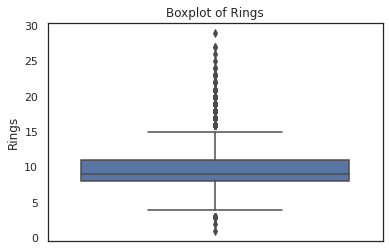

In [ ]:
sns.boxplot(data=df,y='Rings')
plt.title("Boxplot of Rings")
sns.set_style('white')

Text(0.5, 1.0, 'Scatter plot')

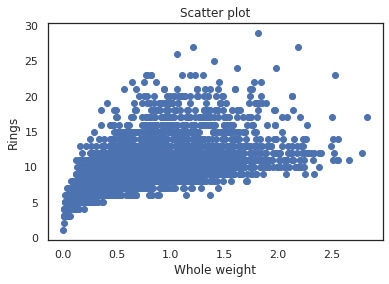

In [104]:
wei= 'Whole weight'
plt.scatter(x = df[wei], y = df['Rings'])
plt.xlabel('Whole weight')
plt.ylabel('Rings')
plt.title('Scatter plot')

Text(0, 0.5, 'Rings Of Abalone')

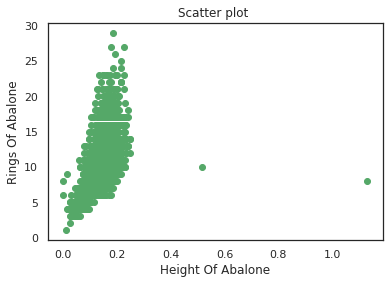

In [ ]:
plt.scatter(df.Height,df.Rings,Color='G')
plt.title("Scatter plot ")
plt.xlabel("Height Of Abalone")
plt.ylabel("Rings Of Abalone")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Rings Of Abalone')

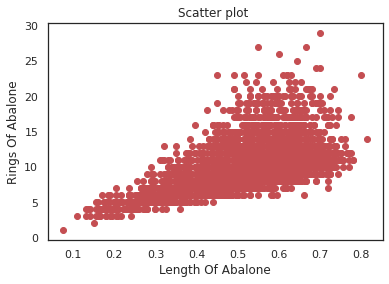

In [ ]:
plt.scatter(df.Length,df.Rings,Color='R')
plt.title("Scatter plot ")
plt.xlabel("Length Of Abalone")
plt.ylabel("Rings Of Abalone")

Text(0.5, 1.0, 'pairplot')

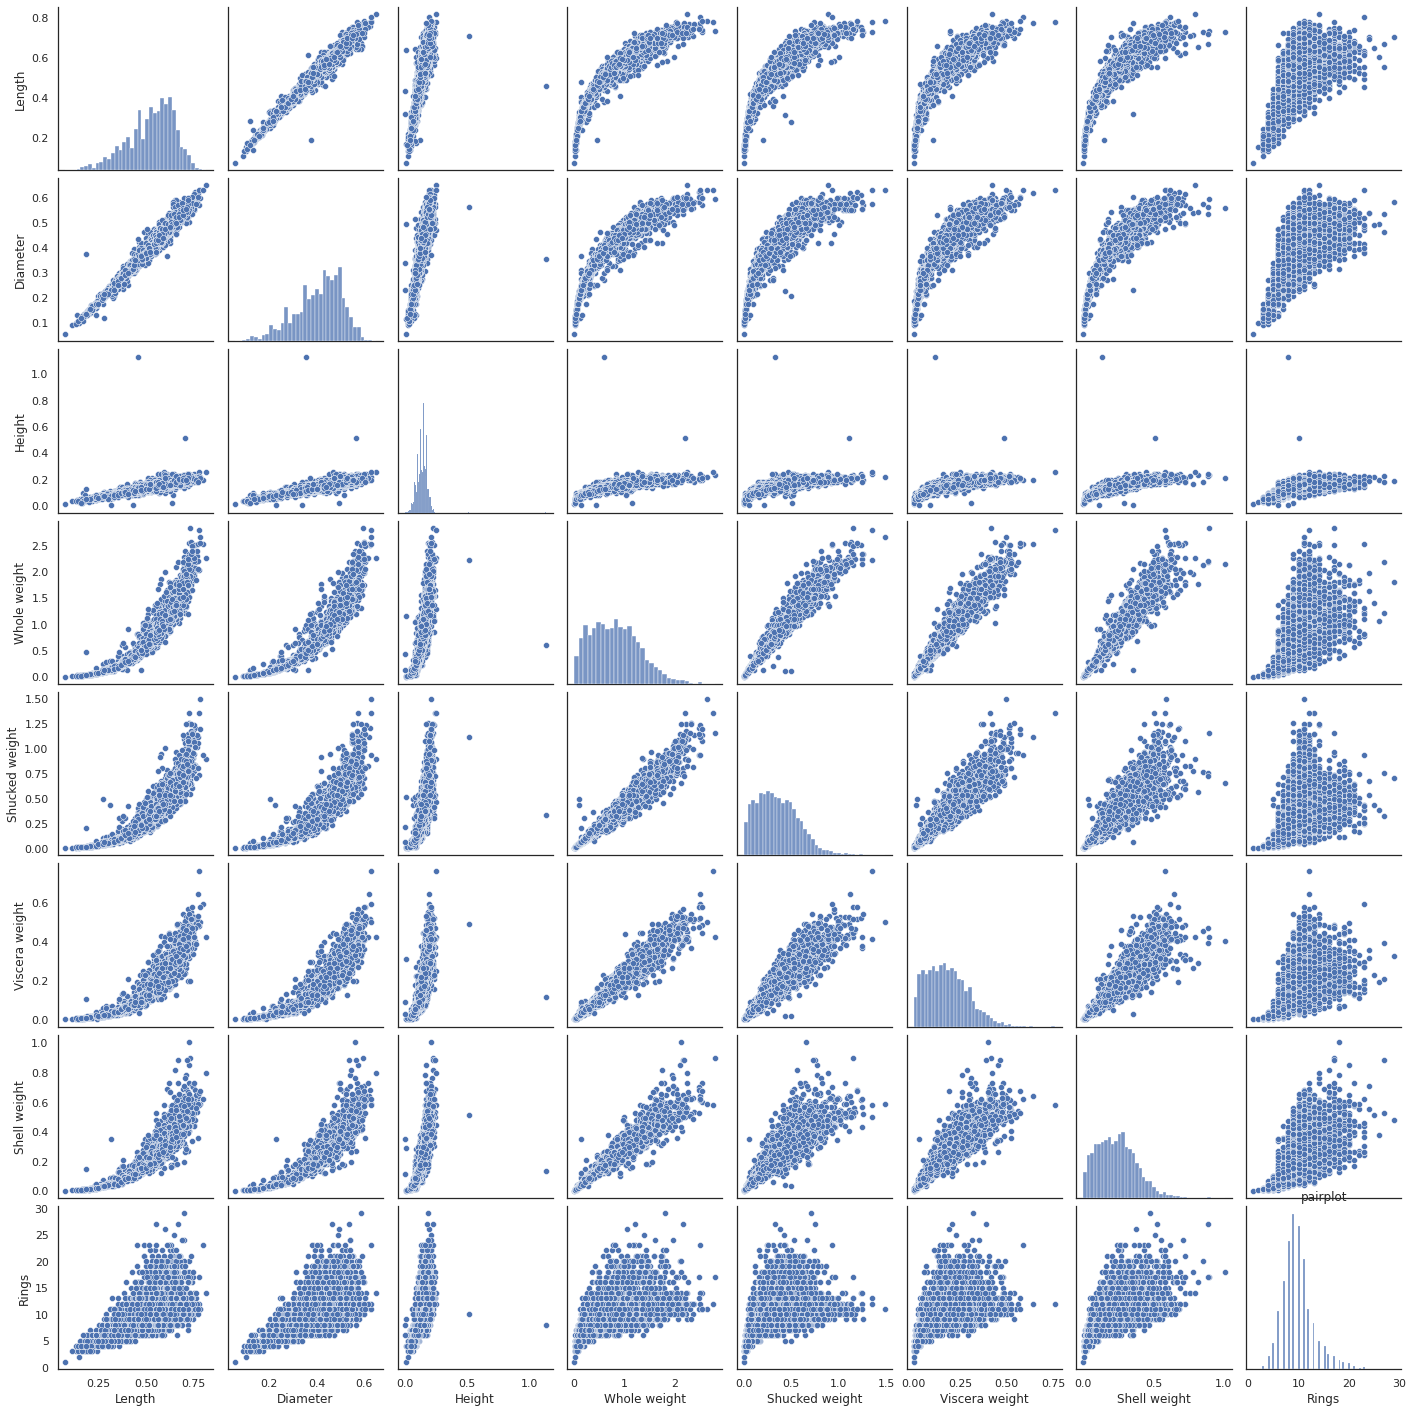

In [ ]:
sns.pairplot(df)
plt.title("pairplot")

In [144]:
#Encoding

le = preprocessing.LabelEncoder()
print(df.Sex.value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [145]:
df.Sex=le.fit_transform(df.Sex)
print(df.Sex.value_counts())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


##Regression model

In [160]:
#independent variables
x=df.iloc[:,0:8]
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [113]:
#dependent variable
y=df.iloc[:,8:9]
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [117]:
df.shape

(4177, 9)

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [162]:
x_train.shape

(3341, 8)

In [163]:
x_test.shape

(836, 8)

Model building

In [164]:
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [165]:
y_test.head()

,Rings
668,13
1580,8
3784,11
463,5
2615,12


In [166]:
slr.predict(x_test)

array([[13.0578998 ],
       [ 9.65069759],
       [10.38007246],
       [ 5.64401046],
       [10.70865673],
       [11.95000656],
       [ 7.83730768],
       [ 9.82182786],
       [ 8.42144478],
       [12.27630026],
       [ 8.69875967],
       [ 6.43514928],
       [ 7.98532548],
       [ 9.00409661],
       [ 5.80540646],
       [ 9.22631732],
       [ 7.75674819],
       [13.89379232],
       [10.99393621],
       [ 8.191136  ],
       [ 7.74226919],
       [ 7.16197224],
       [ 9.34707873],
       [ 7.33539462],
       [10.12590381],
       [11.42356751],
       [ 4.77911095],
       [13.11265461],
       [10.80021849],
       [11.37378523],
       [ 7.95417918],
       [ 4.67963874],
       [11.17116906],
       [12.98656894],
       [ 7.52021898],
       [ 8.32223903],
       [ 8.95069981],
       [10.21202783],
       [ 8.57809836],
       [11.54668603],
       [11.51067522],
       [ 9.17253126],
       [11.83277766],
       [11.74814667],
       [12.4455113 ],
       [ 9

In [167]:
# Measuring performance metrics
r2_score(slr.predict(x_test),y_test)

0.06939452586589134